### DEIMv2-HF

In [1]:
import torch.nn as nn
from huggingface_hub import PyTorchModelHubMixin

from engine.backbone import HGNetv2, DINOv3STAs
from engine.deim import HybridEncoder, LiteEncoder
from engine.deim import DFINETransformer, DEIMTransformer
from engine.deim.postprocessor import PostProcessor

# There is an example in the end!

class DEIMv2(nn.Module, PyTorchModelHubMixin):
    def __init__(self, config):
        super().__init__()
        if 'DINOv3STAs' in config:
            self.backbone = DINOv3STAs(**config["DINOv3STAs"])
        else:
            self.backbone = HGNetv2(**config["HGNetv2"])
        if 'LiteEncoder' in config:
            self.encoder = LiteEncoder(**config["LiteEncoder"])
        else:
            self.encoder = HybridEncoder(**config["HybridEncoder"])
        if 'DEIMTransformer' in config:
            self.decoder = DEIMTransformer(**config["DEIMTransformer"])
        else:
            self.decoder = DFINETransformer(**config["DFINETransformer"])
        self.postprocessor = PostProcessor(**config["PostProcessor"])

    def forward(self, x, orig_target_sizes):
        x = self.backbone(x)
        x = self.encoder(x)
        x = self.decoder(x)
        x = self.postprocessor(x, orig_target_sizes)

        return x


/home/magicbook/miniconda3/envs/py311torch251/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### DEIMv2-Atto

In [59]:
deimv2_atto_config = {
    'HGNetv2': {
        'name': 'Atto',
        'return_idx': [2],
        'freeze_at': -1,
        'freeze_norm': False,
        'use_lab': True,
        "pretrained": False
    },
    'LiteEncoder': {
        'in_channels': [256],
        'feat_strides': [16],
        'hidden_dim': 64,  # intra
        'expansion': 0.34,  # cross
        'depth_mult': 0.5,
        'act': 'silu'
    },
    'DEIMTransformer': {
        'feat_channels': [64, 64],
        'feat_strides': [16, 32],
        'hidden_dim': 64,
        'num_levels': 2,
        'num_points': [4, 2],
        'num_layers': 3,
        'eval_idx': -1,
        'num_queries': 100,
        'dim_feedforward': 160,  # FFN
        'share_bbox_head': True,  # New options for DEIMv2
        'use_gateway': False,
        "eval_spatial_size": [320, 320]
    },
    'PostProcessor': {
        'num_top_queries': 300
    }
}

deimv2_atto = DEIMv2(deimv2_atto_config)
deimv2_atto_hf = DEIMv2.from_pretrained("Intellindust/DEIMv2_HGNetv2_ATTO_COCO")

        ### Backbone.act: relu ###     
        ### Backbone.act: relu ###     
     --- Use Gateway@False ---
     --- Use Share Bbox Head@True ---
     --- Use Share Score Head@False ---
     --- Wide Layer@1 ---
        ### Backbone.act: relu ###     
        ### Backbone.act: relu ###     
     --- Use Gateway@False ---
     --- Use Share Bbox Head@True ---
     --- Use Share Score Head@False ---
     --- Wide Layer@1 ---


### DEIMv2-Femto

In [60]:
deimv2_femto_config = {
  "HGNetv2": {
    "name": "Femto",
    "return_idx": [
      2
    ],
    "freeze_at": -1,
    "freeze_norm": False,
    "use_lab": True,
    "pretrained": False
  },
  "LiteEncoder": {
    "in_channels": [
      512
    ],
    "feat_strides": [
      16
    ],
    "hidden_dim": 96,
    "expansion": 0.34,
    "depth_mult": 0.5,
    "act": "silu"
  },
  "DEIMTransformer": {
    "feat_channels": [
      96,
      96
    ],
    "feat_strides": [
      16,
      32
    ],
    "hidden_dim": 96,
    "num_levels": 2,
    "num_points": [
      4,
      2
    ],
    "num_layers": 3,
    "eval_idx": -1,
    "num_queries": 150,
    "dim_feedforward": 256,
    "share_bbox_head": True,
    "use_gateway": False,
    "eval_spatial_size": [
      416,
      416
    ]
  },
  "PostProcessor": {
    "num_top_queries": 300
  }
}

deimv2_femto = DEIMv2(deimv2_femto_config)
deimv2_femto_hf = DEIMv2.from_pretrained("Intellindust/DEIMv2_HGNetv2_FEMTO_COCO")

        ### Backbone.act: relu ###     
        ### Backbone.act: relu ###     
     --- Use Gateway@False ---
     --- Use Share Bbox Head@True ---
     --- Use Share Score Head@False ---
     --- Wide Layer@1 ---
        ### Backbone.act: relu ###     
        ### Backbone.act: relu ###     
     --- Use Gateway@False ---
     --- Use Share Bbox Head@True ---
     --- Use Share Score Head@False ---
     --- Wide Layer@1 ---


### DEIMv2-Pico

In [61]:
deimv2_pico_config = {
  "HGNetv2": {
    "name": "Pico",
    "return_idx": [
      2
    ],
    "freeze_at": -1,
    "freeze_norm": False,
    "use_lab": True,
    "pretrained": False
  },
  "LiteEncoder": {
    "in_channels": [
      512
    ],
    "feat_strides": [
      16
    ],
    "hidden_dim": 112,
    "expansion": 0.34,
    "depth_mult": 0.5,
    "act": "silu"
  },
  "DEIMTransformer": {
    "feat_channels": [
      112,
      112
    ],
    "feat_strides": [
      16,
      32
    ],
    "hidden_dim": 112,
    "num_levels": 2,
    "num_points": [
      4,
      2
    ],
    "num_layers": 3,
    "eval_idx": -1,
    "num_queries": 200,
    "dim_feedforward": 320,
    "share_bbox_head": True,
    "use_gateway": False,
    "eval_spatial_size": [
      640,
      640
    ]
  },
  "PostProcessor": {
    "num_top_queries": 300
  }
}

deimv2_pico = DEIMv2(deimv2_pico_config)
deimv2_pico_hf = DEIMv2.from_pretrained("Intellindust/DEIMv2_HGNetv2_PICO_COCO")

        ### Backbone.act: relu ###     
        ### Backbone.act: relu ###     
     --- Use Gateway@False ---
     --- Use Share Bbox Head@True ---
     --- Use Share Score Head@False ---
     --- Wide Layer@1 ---
        ### Backbone.act: relu ###     
        ### Backbone.act: relu ###     
     --- Use Gateway@False ---
     --- Use Share Bbox Head@True ---
     --- Use Share Score Head@False ---
     --- Wide Layer@1 ---


### DEIMv2-N

In [62]:
deimv2_n_config = {
    'HGNetv2': {
        'name': 'B0',
        'return_idx': [2, 3],
        'freeze_at': -1,
        'freeze_stem_only': True,
        'freeze_norm': False,
        'pretrained': False,
        'use_lab': True
    },
    'HybridEncoder': {
        'in_channels': [512, 1024],
        'feat_strides': [16, 32],
        'hidden_dim': 128,
        'use_encoder_idx': [1],
        'num_encoder_layers': 1,
        'nhead': 8,
        'dim_feedforward': 512,
        'dropout': 0.0,
        'enc_act': 'gelu',
        'expansion': 0.34,
        'depth_mult': 0.5,
        'act': 'silu',
        'version': 'dfine',
        'csp_type': 'csp2',
        'fuse_op': 'sum'
    },
    'DEIMTransformer': {
        'feat_channels': [128, 128],
        'feat_strides': [16, 32],
        'hidden_dim': 128,
        'num_levels': 2,
        'num_layers': 3,
        'eval_idx': -1,
        'num_queries': 300,
        'num_denoising': 100,
        'label_noise_ratio': 0.5,
        'box_noise_scale': 1.0,
        'reg_max': 32,
        'reg_scale': 4,
        'layer_scale': 1,
        'num_points': [6, 6],
        'cross_attn_method': 'default',
        'query_select_method': 'default',
        'activation': 'silu',
        'mlp_act': 'silu',
        'dim_feedforward': 512,
        'eval_spatial_size': [640, 640]
    },
    'PostProcessor': {
        'num_top_queries': 300
    }
}

deimv2_n = DEIMv2(deimv2_n_config)
deimv2_n_hf = DEIMv2.from_pretrained("Intellindust/DEIMv2_HGNetv2_N_COCO")

        ### Backbone.act: relu ###     
        ### Backbone.act: relu ###     
     --- Use Gateway@True ---
     --- Use Share Bbox Head@False ---
     --- Use Share Score Head@False ---
     --- Wide Layer@1 ---
        ### Backbone.act: relu ###     
        ### Backbone.act: relu ###     
     --- Use Gateway@True ---
     --- Use Share Bbox Head@False ---
     --- Use Share Score Head@False ---
     --- Wide Layer@1 ---


### DEIMv2-S

In [63]:
deimv2_s_config = {
  "DINOv3STAs": {
    "name": "vit_tiny",
    "embed_dim": 192,
    "interaction_indexes": [
      5,
      8,
      11
    ],
    "num_heads": 3
  },
  "HybridEncoder": {
    "in_channels": [
      192,
      192,
      192
    ],
    "feat_strides": [
      8,
      16,
      32
    ],
    "hidden_dim": 192,
    "use_encoder_idx": [
      2
    ],
    "num_encoder_layers": 1,
    "nhead": 8,
    "dim_feedforward": 512,
    "dropout": 0.0,
    "enc_act": "gelu",
    "expansion": 0.34,
    "depth_mult": 0.67,
    "act": "silu",
    "version": "deim",
    "csp_type": "csp2",
    "fuse_op": "sum"
  },
  "DEIMTransformer": {
    "feat_channels": [
      192,
      192,
      192
    ],
    "feat_strides": [
      8,
      16,
      32
    ],
    "hidden_dim": 192,
    "num_levels": 3,
    "num_layers": 4,
    "eval_idx": -1,
    "num_queries": 300,
    "num_denoising": 100,
    "label_noise_ratio": 0.5,
    "box_noise_scale": 1.0,
    "reg_max": 32,
    "reg_scale": 4,
    "layer_scale": 1,
    "num_points": [
      3,
      6,
      3
    ],
    "cross_attn_method": "default",
    "query_select_method": "default",
    "activation": "silu",
    "mlp_act": "silu",
    "dim_feedforward": 512,
    "eval_spatial_size": [640, 640],
  },
  "PostProcessor": {
    "num_top_queries": 300
  },
}

deimv2_s = DEIMv2(deimv2_s_config)
deimv2_s_hf = DEIMv2.from_pretrained("Intellindust/DEIMv2_DINOv3_S_COCO")

Training ViT-Tiny from scratch...
Using Lite Spatial Prior Module with inplanes=16
     --- Use Gateway@True ---
     --- Use Share Bbox Head@False ---
     --- Use Share Score Head@False ---
     --- Wide Layer@1 ---
Training ViT-Tiny from scratch...
Using Lite Spatial Prior Module with inplanes=16
     --- Use Gateway@True ---
     --- Use Share Bbox Head@False ---
     --- Use Share Score Head@False ---
     --- Wide Layer@1 ---


### DEIMv2-M

In [64]:
deimv2_m_config = {
  "DINOv3STAs": {
    "name": "vit_tinyplus",
    "embed_dim": 256,
    "interaction_indexes": [
      5,
      8,
      11
    ],
    "num_heads": 4
  },
  "HybridEncoder": {
    "in_channels": [
      256,
      256,
      256
    ],
    "feat_strides": [
      8,
      16,
      32
    ],
    "hidden_dim": 256,
    "use_encoder_idx": [
      2
    ],
    "num_encoder_layers": 1,
    "nhead": 8,
    "dim_feedforward": 512,
    "dropout": 0.0,
    "enc_act": "gelu",
    "expansion": 0.67,
    "depth_mult": 1,
    "act": "silu",
    "version": "deim",
    "csp_type": "csp2",
    "fuse_op": "sum"
  },
  "DEIMTransformer": {
    "feat_channels": [
      256,
      256,
      256
    ],
    "feat_strides": [
      8,
      16,
      32
    ],
    "hidden_dim": 256,
    "num_levels": 3,
    "num_layers": 4,
    "eval_idx": -1,
    "num_queries": 300,
    "num_denoising": 100,
    "label_noise_ratio": 0.5,
    "box_noise_scale": 1.0,
    "reg_max": 32,
    "reg_scale": 4,
    "layer_scale": 1,
    "num_points": [
      3,
      6,
      3
    ],
    "cross_attn_method": "default",
    "query_select_method": "default",
    "activation": "silu",
    "mlp_act": "silu",
    "dim_feedforward": 512,
    "eval_spatial_size": [
      640,
      640
    ]
  },
  "PostProcessor": {
    "num_top_queries": 300
  }
}

deimv2_m = DEIMv2(deimv2_m_config)
deimv2_m_hf = DEIMv2.from_pretrained("Intellindust/DEIMv2_DINOv3_S_COCO")

Training ViT-Tiny from scratch...
Using Lite Spatial Prior Module with inplanes=16
     --- Use Gateway@True ---
     --- Use Share Bbox Head@False ---
     --- Use Share Score Head@False ---
     --- Wide Layer@1 ---
Training ViT-Tiny from scratch...
Using Lite Spatial Prior Module with inplanes=16
     --- Use Gateway@True ---
     --- Use Share Bbox Head@False ---
     --- Use Share Score Head@False ---
     --- Wide Layer@1 ---


### DEIMv2-L

In [65]:
deimv2_l_config = {
  "DINOv3STAs": {
    "name": "dinov3_vits16",
    "embed_dim": 224,
    "interaction_indexes": [
      5,
      8,
      11
    ],
    "num_heads": None,
    "conv_inplane": 32,
    "hidden_dim": 224
  },
  "HybridEncoder": {
    "in_channels": [
      224,
      224,
      224
    ],
    "feat_strides": [
      8,
      16,
      32
    ],
    "hidden_dim": 224,
    "use_encoder_idx": [
      2
    ],
    "num_encoder_layers": 1,
    "nhead": 8,
    "dim_feedforward": 896,
    "dropout": 0.0,
    "enc_act": "gelu",
    "expansion": 1.0,
    "depth_mult": 1,
    "act": "silu",
    "version": "deim",
    "csp_type": "csp2",
    "fuse_op": "sum"
  },
  "DEIMTransformer": {
    "feat_channels": [
      224,
      224,
      224
    ],
    "feat_strides": [
      8,
      16,
      32
    ],
    "hidden_dim": 224,
    "num_levels": 3,
    "num_layers": 4,
    "eval_idx": -1,
    "num_queries": 300,
    "num_denoising": 100,
    "label_noise_ratio": 0.5,
    "box_noise_scale": 1.0,
    "reg_max": 32,
    "reg_scale": 4,
    "layer_scale": 1,
    "num_points": [
      3,
      6,
      3
    ],
    "cross_attn_method": "default",
    "query_select_method": "default",
    "activation": "silu",
    "mlp_act": "silu",
    "dim_feedforward": 1792,
    "eval_spatial_size": [
      640,
      640
    ]
  },
  "PostProcessor": {
    "num_top_queries": 300
  }
}

deimv2_l = DEIMv2(deimv2_l_config)
deimv2_l_hf = DEIMv2.from_pretrained("Intellindust/DEIMv2_DINOv3_L_COCO")

Training DINOv3 from scratch...
Using Lite Spatial Prior Module with inplanes=32
     --- Use Gateway@True ---
     --- Use Share Bbox Head@False ---
     --- Use Share Score Head@False ---
     --- Wide Layer@1 ---
Training DINOv3 from scratch...
Using Lite Spatial Prior Module with inplanes=32
     --- Use Gateway@True ---
     --- Use Share Bbox Head@False ---
     --- Use Share Score Head@False ---
     --- Wide Layer@1 ---


### DEIMv2-X

In [2]:
deimv2_x_config = {
  "DINOv3STAs": {
    "name": "dinov3_vits16plus",
    "embed_dim": 256,
    "interaction_indexes": [
      5,
      8,
      11
    ],
    "num_heads": None,
    "conv_inplane": 64,
    "hidden_dim": 256
  },
  "HybridEncoder": {
    "in_channels": [
      256,
      256,
      256
    ],
    "feat_strides": [
      8,
      16,
      32
    ],
    "hidden_dim": 256,
    "use_encoder_idx": [
      2
    ],
    "num_encoder_layers": 1,
    "nhead": 8,
    "dim_feedforward": 1024,
    "dropout": 0.0,
    "enc_act": "gelu",
    "expansion": 1.25,
    "depth_mult": 1.37,
    "act": "silu",
    "version": "deim",
    "csp_type": "csp2",
    "fuse_op": "sum"
  },
  "DEIMTransformer": {
    "feat_channels": [
      256,
      256,
      256
    ],
    "feat_strides": [
      8,
      16,
      32
    ],
    "hidden_dim": 256,
    "num_levels": 3,
    "num_layers": 6,
    "eval_idx": -1,
    "num_queries": 300,
    "num_denoising": 100,
    "label_noise_ratio": 0.5,
    "box_noise_scale": 1.0,
    "reg_max": 32,
    "reg_scale": 4,
    "layer_scale": 1,
    "num_points": [
      3,
      6,
      3
    ],
    "cross_attn_method": "default",
    "query_select_method": "default",
    "activation": "silu",
    "mlp_act": "silu",
    "dim_feedforward": 2048,
    "eval_spatial_size": [
      640,
      640
    ]
  },
  "PostProcessor": {
    "num_top_queries": 300
  }
}

deimv2_x = DEIMv2(deimv2_x_config)
deimv2_x_hf = DEIMv2.from_pretrained("Intellindust/DEIMv2_DINOv3_X_COCO")

Training DINOv3 from scratch...
Using Lite Spatial Prior Module with inplanes=64
     --- Use Gateway@True ---
     --- Use Share Bbox Head@False ---
     --- Use Share Score Head@False ---
     --- Wide Layer@1 ---
Training DINOv3 from scratch...
Using Lite Spatial Prior Module with inplanes=64
     --- Use Gateway@True ---
     --- Use Share Bbox Head@False ---
     --- Use Share Score Head@False ---
     --- Wide Layer@1 ---


### Example

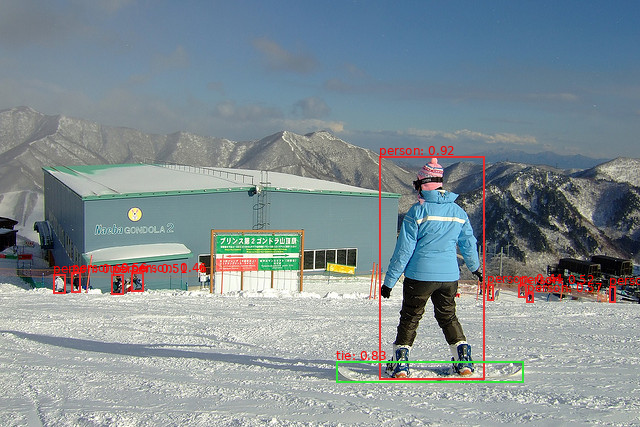

In [31]:
import colorsys
import torch
from torchvision import transforms
from PIL import Image, ImageDraw, ImageFont

MODEL = deimv2_x_hf
IMAGE_SIZE = (640, 640)  # resolution settings of model, you can find in config
IMAGE_PATH = "example.jpg"  # path of input image
CONFIDENCE_THRESHOLD = 0.4

font_path = "/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf"
font_size = 12
font = ImageFont.truetype(font_path, font_size)

label_map = {
    1: 'person', 2: 'bicycle', 3: 'car', 4: 'motorbike', 5: 'aeroplane',
    6: 'bus', 7: 'train', 8: 'truck', 9: 'boat', 10: 'trafficlight',
    11: 'firehydrant', 12: 'streetsign', 13: 'stopsign', 14: 'parkingmeter',
    15: 'bench', 16: 'bird', 17: 'cat', 18: 'dog', 19: 'horse',
    20: 'sheep', 21: 'cow', 22: 'elephant', 23: 'bear', 24: 'zebra',
    25: 'giraffe', 26: 'hat', 27: 'backpack', 28: 'umbrella', 29: 'shoe',
    30: 'eyeglasses', 31: 'handbag', 32: 'tie', 33: 'suitcase', 34: 'frisbee',
    35: 'skis', 36: 'snowboard', 37: 'sportsball', 38: 'kite', 39: 'baseballbat',
    40: 'baseballglove', 41: 'skateboard', 42: 'surfboard', 43: 'tennisracket',
    44: 'bottle', 45: 'plate', 46: 'wineglass', 47: 'cup', 48: 'fork',
    49: 'knife', 50: 'spoon', 51: 'bowl', 52: 'banana', 53: 'apple',
    54: 'sandwich', 55: 'orange', 56: 'broccoli', 57: 'carrot', 58: 'hotdog',
    59: 'pizza', 60: 'donut', 61: 'cake', 62: 'chair', 63: 'sofa',
    64: 'pottedplant', 65: 'bed', 66: 'mirror', 67: 'diningtable', 68: 'window',
    69: 'desk', 70: 'toilet', 71: 'door', 72: 'tv', 73: 'laptop',
    74: 'mouse', 75: 'remote', 76: 'keyboard', 77: 'cellphone', 78: 'microwave',
    79: 'oven', 80: 'toaster', 81: 'sink', 82: 'refrigerator', 83: 'blender',
    84: 'book', 85: 'clock', 86: 'vase', 87: 'scissors', 88: 'teddybear',
    89: 'hairdrier', 90: 'toothbrush', 91: 'hairbrush'
}

num_classes = len(label_map)
category_colors = {}
for i, label in enumerate(label_map.values()):
    hue = i / num_classes
    saturation = 0.8
    value = 0.9
    rgb = colorsys.hsv_to_rgb(hue, saturation, value)
    rgb = tuple(int(c * 255) for c in rgb)
    category_colors[label] = rgb

image = Image.open(IMAGE_PATH).convert("RGB")

transform = transforms.Compose([
    transforms.Resize(IMAGE_SIZE),
    transforms.ToTensor(),
])

input_tensor = transform(image).unsqueeze(0)

MODEL.eval()
with torch.no_grad():
    outputs = MODEL(input_tensor, orig_target_sizes=torch.tensor([IMAGE_SIZE]))

class_labels, bboxes, scores = outputs[0]["labels"], outputs[0]["boxes"], outputs[0]["scores"]

detections = []
for label, bbox, score in zip(class_labels, bboxes, scores):
    if score.item() >= CONFIDENCE_THRESHOLD:
        detection = {
            "label": label_map[label.item() + 1],
            "bounding_box": [
                bbox[0] / IMAGE_SIZE[0],
                bbox[1] / IMAGE_SIZE[1],
                (bbox[2] - bbox[0]) / IMAGE_SIZE[0],
                (bbox[3] - bbox[1]) / IMAGE_SIZE[1]
            ],
            "confidence": score.item()
        }
        detections.append(detection)

draw = ImageDraw.Draw(image)
for detection in detections:
    label = detection["label"]
    confidence = detection["confidence"]
    bbox = detection["bounding_box"]

    x_min = bbox[0] * image.width
    y_min = bbox[1] * image.height
    x_max = (bbox[0] + bbox[2]) * image.width
    y_max = (bbox[1] + bbox[3]) * image.height

    color = category_colors[label]

    draw.rectangle([x_min, y_min, x_max, y_max], outline=color, width=2)
    draw.text((x_min, y_min - 13), f"{label}: {confidence:.2f}", fill="red", font=font)

image.show()